### Trend Search Overview

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from FinancialMachineLearning.labeling.trend_search import trend_labeling

#### Experiment

추세 검색 방법에 대한 실험결과, GeometricBrownianMotion을 이용한다

In [2]:
from FinancialMachineLearning.generator.stochasticprocess import *

brownian_motion = GeometricBrownianMotion(mu = 0, sigma = 0.028, 
                                          n_paths = 1, n_steps = 200, 
                                          start = 10, end = 252, initial_price = 1000)

In [3]:
simulation = brownian_motion.simulate()

<Axes: >

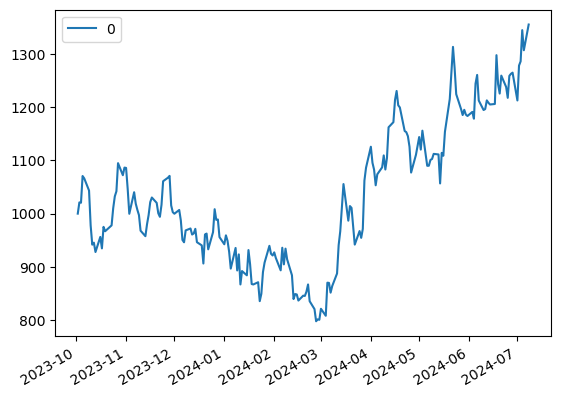

In [4]:
simulation.plot()

In [5]:
df1 = trend_labeling(simulation.index, simulation, span = [1, 5, 1])

In [6]:
df1

,t1,tVal,bin
2023-10-02 02:23:25.825911,2023-10-05 02:23:25.825911,3.055383,1.0
2023-10-03 02:23:25.825911,2023-10-06 02:23:25.825911,2.477586,1.0
2023-10-04 02:23:25.825911,2023-10-09 02:23:25.825911,1.455176,1.0
2023-10-05 02:23:25.825911,2023-10-10 02:23:25.825911,-3.068661,-1.0
2023-10-06 02:23:25.825911,2023-10-11 02:23:25.825911,-7.978318,-1.0
...,...,...,...
2024-06-27 02:23:25.825911,2024-07-02 02:23:25.825911,-1.592391,-1.0
2024-06-28 02:23:25.825911,2024-07-03 02:23:25.825911,0.826822,1.0
2024-07-01 02:23:25.825911,2024-07-04 02:23:25.825911,5.237644,1.0
2024-07-02 02:23:25.825911,2024-07-05 02:23:25.825911,2.279726,1.0


Text(0.5, 1.0, 'Labeling with Trend Serching')

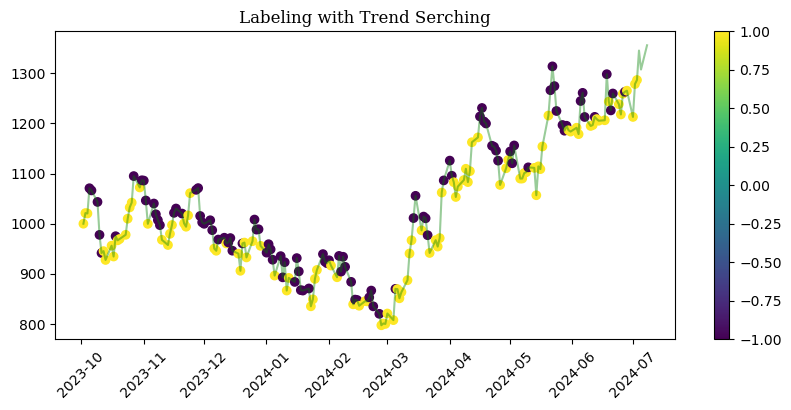

In [7]:
plt.figure(figsize = (10, 4))
plt.scatter(df1.index, simulation.loc[df1.index].values, c = df1['bin'].values, cmap = 'viridis')
plt.plot(simulation, color = 'green', alpha = 0.4)
plt.xticks(rotation=45)
plt.colorbar()
plt.title('Labeling with Trend Serching', fontsize = 12, fontfamily = 'Serif')

#### Historical Data review

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2022-01-01'
end_date = '2023-10-01'

apple = yf.download('AAPL', start = start_date, end = end_date).iloc[:,:-1]
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190979
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904068
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281021
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310
...,...,...,...,...,...
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993


In [9]:
apple_trend = trend_labeling(apple.index, apple.Close, span = [1, 5, 1])

In [10]:
apple_trend['scale'] = apple_trend['tVal']

In [11]:
apple_trend.loc[apple_trend['scale'] > 10, 'scale'] = 10
apple_trend.loc[apple_trend['scale'] < -10, 'scale'] = -10

In [12]:
apple_trend['tVal'].abs()

Date
2022-01-03    10.84391
2022-01-04    7.170313
2022-01-05    1.547528
2022-01-06    2.194048
2022-01-07    3.399032
                ...   
2023-09-20    0.557098
2023-09-21    8.660131
2023-09-22     2.38794
2023-09-25    3.778446
2023-09-26    1.228873
Name: tVal, Length: 435, dtype: object

tVal의 값은 Machine Learning Classification model에서 sample weights로 사용 가능하다. Daily Data, low frequency에서 Average Uniqueness 대신 사용할 수 있을 것이다

Text(0.5, 1.0, 'Labeling with Trend Serching')

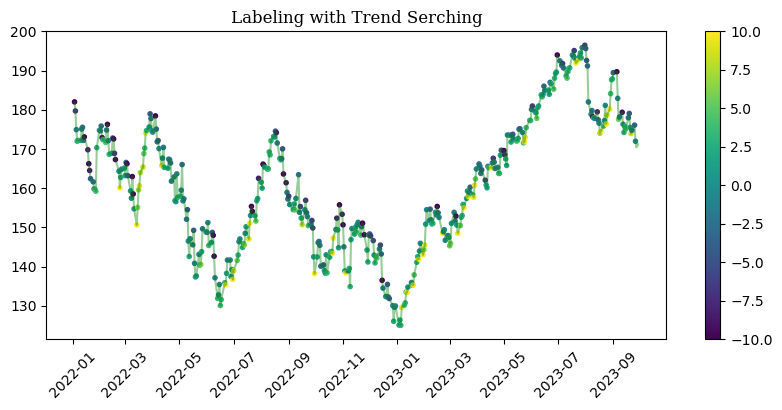

In [13]:
plt.figure(figsize = (10, 4))

plt.scatter(apple_trend.index, apple.Close.loc[apple_trend.index].values, c = apple_trend['scale'], cmap = 'viridis', marker = '.')
plt.plot(apple.Close, color = 'green', alpha = 0.4)
plt.xticks(rotation=45)
plt.colorbar()
plt.title('Labeling with Trend Serching', fontsize = 12, fontfamily = 'Serif')

bin의 결과를 활용하면 classification model의 class로 사용 가능하다

Text(0.5, 1.0, 'Labeling with Trend Serching')

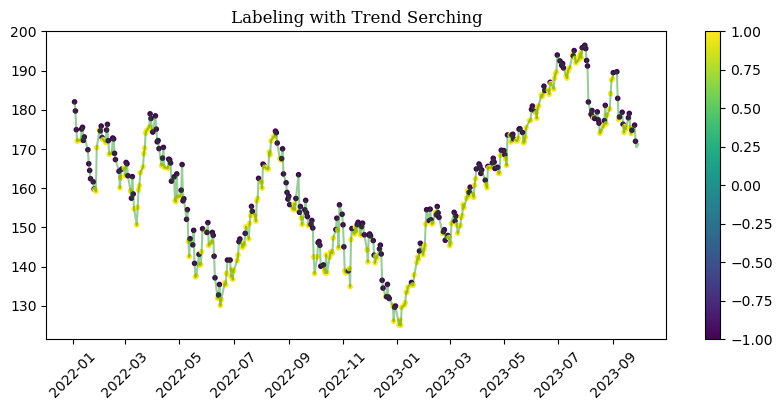

In [14]:
plt.figure(figsize = (10, 4))

plt.scatter(apple_trend.index, apple.Close.loc[apple_trend.index].values, c = apple_trend['bin'], cmap = 'viridis', marker = '.')
plt.plot(apple.Close, color = 'green', alpha = 0.4)
plt.xticks(rotation=45)
plt.colorbar()
plt.title('Labeling with Trend Serching', fontsize = 12, fontfamily = 'Serif')